In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
X = data["data"].copy()[ :, 2:4]# 2 columns to allow straightforward decision boundary visualization
y = data["target"].copy()

stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in stratSplit.split(X, y):
    X_train = X[train_index]
    X_test = X[test_index]
    
    y_train = y[train_index]
    y_test = y[test_index]

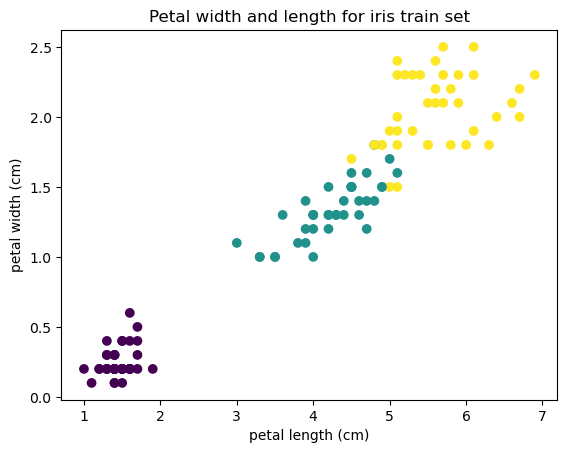

In [3]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.title("Petal width and length for iris train set")
plt.savefig("irisSimpleScatter.png", bbox_inches="tight")
plt.show()

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz # http://www.graphviz.org/

dt_clf = DecisionTreeClassifier(criterion = "gini", #gini or entropy
                                splitter = "best", #best or random
                                max_depth = None,
                                min_samples_split = 2, # float uses proportion of total samples
                                min_samples_leaf = 1,
                                min_weight_fraction_leaf = 0,
                                max_features = None, # int, float, 'auto' (auto=sqrt), 'sqrt', 'log2' #max number of features in our subset
                                max_leaf_nodes = None,
                                random_state = None,
                                min_impurity_decrease = 0.0,
                                class_weight = None, # 'balanced', list, or dict, (list of dicts for multi-output/label)
                                ccp_alpha = 0.0 #has to be positive and a float
                               )
dt_clf.fit(X_train, y_train)
export_graphviz(
                dt_clf, out_file="D_tree_iris.dot", feature_names=data.feature_names[2:],
                class_names=data.target_names, rounded=True, filled=True
                )

#graphviz stores the structure of the tree in a dot-file
# use this line in the terminal: dot -Tpng D_tree_iris.dot -o D_tree_iris.png

 **Here's a description of your code:**

**1. Importing Necessary Libraries:**

- The code doesn't explicitly import libraries, but it's likely using `pandas` for data manipulation and `sklearn.tree` for the decision tree classifier.

**2. Creating a Decision Tree Classifier:**

- `dt_clf = DecisionTreeClassifier(...)`: This line creates a decision tree classifier object with several parameters specified:

**Parameters:**

- **criterion = "gini":** This sets the measure used to evaluate split quality. "gini" uses the Gini impurity, while "entropy" uses information gain.
- **splitter = "best":** This determines how splits are chosen at each node. "best" chooses the split that gives the best information gain, while "random" chooses a random split.
- **max_depth = None:** This sets the maximum depth of the tree. None means the tree will grow until all leaves are pure or contain a single sample.
- **min_samples_split = 2:** This sets the minimum number of samples required to split an internal node.
- **min_samples_leaf = 1:** This sets the minimum number of samples required to be at a leaf node.
- **min_weight_fraction_leaf = 0:** This sets the minimum weighted fraction of the sum total of weights required to be at a leaf node.
- **max_features = None:** This sets the number of features to consider when looking for the best split. None means all features are considered.
- **max_leaf_nodes = None:** This sets the maximum number of leaf nodes.
- **random_state = None:** This sets the random seed for reproducibility.
- **min_impurity_decrease = 0.0:** This sets the minimum impurity decrease required to make a split.
- **class_weight = None:** This sets the weights associated with classes in the form of a dictionary.
- **ccp_alpha = 0.0:** This sets the complexity parameter used for Minimal Cost-Complexity Pruning.


---------------------------

In [9]:
dt_clf.feature_importances_

array([0.02845036, 0.97154964])

In [10]:
#plotting the decision boundaries (from the lesson before)
def plotDecisionBoundary(svc, X, y, X_train, y_train, title, ax):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    xx_r = xx.ravel()
    yy_r = yy.ravel()
    Z = svc.predict(np.c_[xx_r, yy_r])

    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
    ax.scatter(X[:, 0],X[:, 1],c=y, cmap=plt.cm.cool)
    ax.set_xlabel(data["feature_names"][2])
    ax.set_ylabel(data["feature_names"][3])
    ax.set_title(title)
    

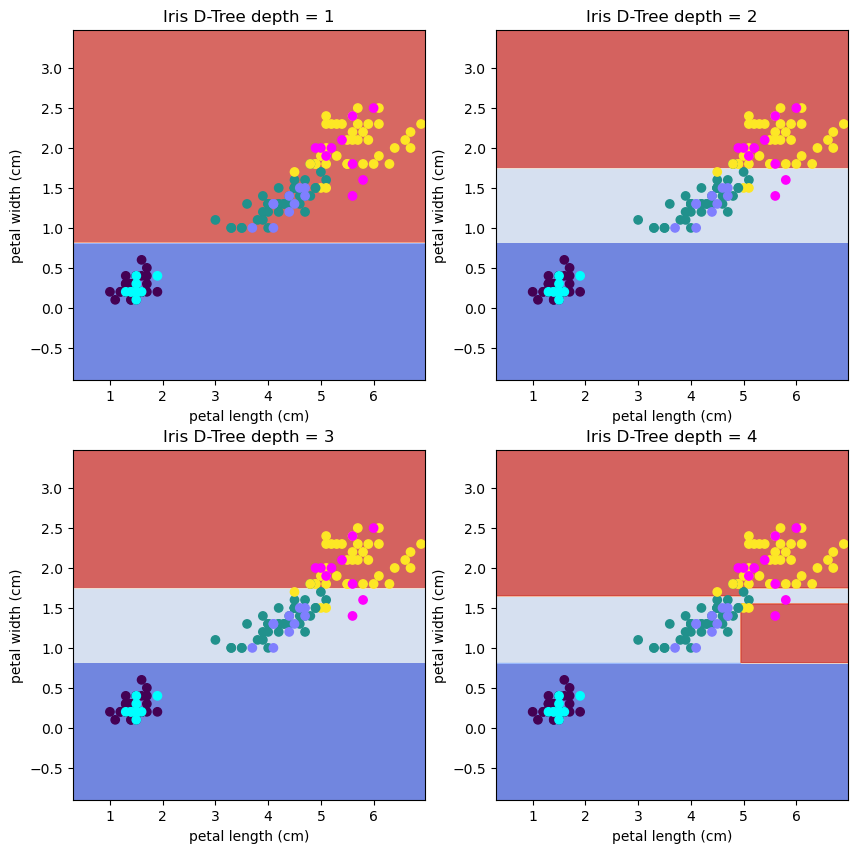

In [11]:
fig = plt.figure(figsize=(10,10))
max_depth = 1

#loop that goes through the tree dots, for each tree dot it trains a decision tree classifier
for i in range(1,5): #4 images 
    ax = fig.add_subplot(2,2,i)
    dt_clf = DecisionTreeClassifier(max_depth = max_depth, random_state = 1)
    dt_clf.fit(X_train, y_train)
    plotDecisionBoundary(dt_clf, X_test, y_test, X_train, 
                         y_train, title=f"Iris D-Tree depth = {max_depth}", ax=ax)
    max_depth += 1
plt.show()

#image 1: underfit
#image 2: with a second major split
#image 3: same as image 2
#image 4: two extra splits

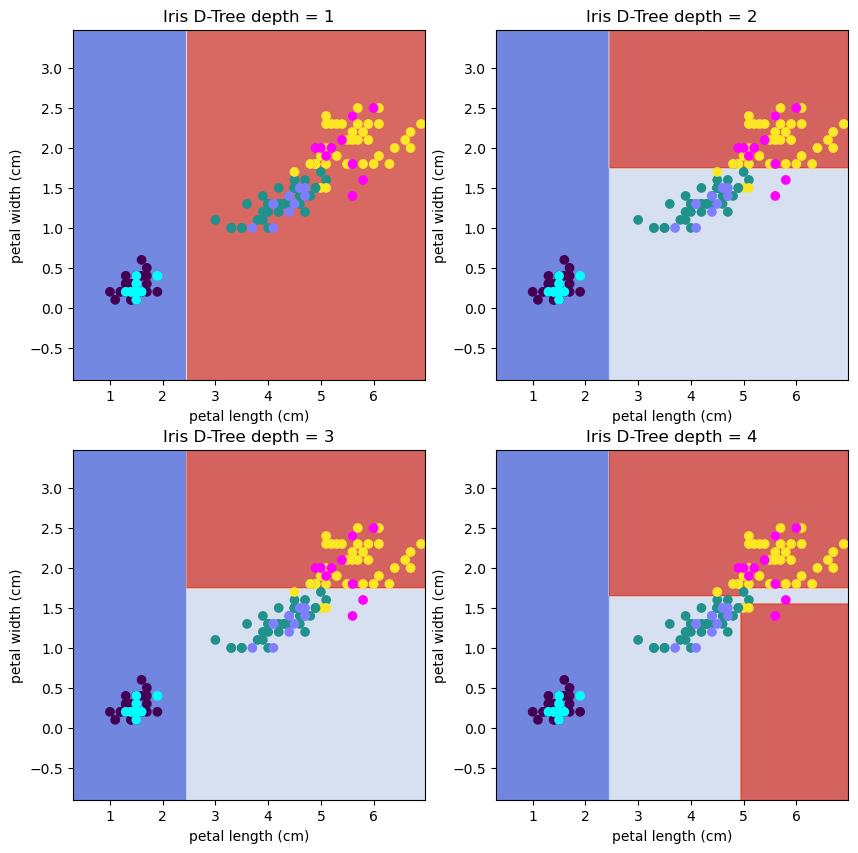

In [15]:
fig = plt.figure(figsize=(10,10))
max_depth = 1

for i in range(1,5):
    ax = fig.add_subplot(2,2,i)
    #using a different random state makes our splits parallel to the y axis
    dt_clf = DecisionTreeClassifier(max_depth = max_depth, random_state = 45)
    dt_clf.fit(X_train, y_train)
    plotDecisionBoundary(dt_clf, X_test, y_test, X_train, 
                         y_train, title=f"Iris D-Tree depth = {max_depth}", ax=ax)
    max_depth += 1
plt.show()